In [1]:
from qick import *
from qick.rfboard import RFQickSoc216V1
from test_rf216_v1 import *

import pynq.overlay

from tqdm.auto import tqdm

import numpy as np
from numpy.fft import fft, fftshift
from scipy.signal import welch

import matplotlib.pyplot as plt

import scipy.io

In [127]:
# Load bitstream with custom overlay
# soc = RFBoardTestSoc('./test_rf216_v1.bit', clk_output=None, no_tproc=True)
# soc = RFBoardTestSoc('./test_rf216_v1_kt.bit', clk_output=None, no_tproc=True)
# soc = RFBoardTestSoc('./test_rf216_v2_kt.bit', clk_output=None, no_tproc=True)
# soc = RFBoardTestSoc('./test_rf216_v2_ktx.bit', clk_output=None, no_tproc=True)
# soc = RFBoardTestSoc('./test_rf216_v2-dc_tst_kt.bit', clk_output=None, no_tproc=True)

soc = RFQickSoc216V1('/home/xilinx/jupyter_notebooks/fw/qick_rf216/qick_rf216_v2.bit', clk_output=None)


#soc = QickSoc('../qick/qick_lib/qick/qick_216.bit')
soccfg = soc

print(soccfg)

QICK running on ZCU216, software version 0.2.276

Firmware configuration (built Wed Jan 31 08:18:41 2024):

	Global clocks (MHz): tProcessor 349.997, RF reference 245.760

	16 signal generator channels:
	0:	axis_sg_int4_v1 - envelope memory 4096 samples (13.333 us)
		fs=4915.200 MHz, fabric=307.200 MHz, 16-bit DDS, range=1228.800 MHz
		DAC tile 0, blk 0 is 0_228, on JHC1
	1:	axis_sg_int4_v1 - envelope memory 4096 samples (13.333 us)
		fs=4915.200 MHz, fabric=307.200 MHz, 16-bit DDS, range=1228.800 MHz
		DAC tile 0, blk 1 is 1_228, on JHC2
	2:	axis_sg_int4_v1 - envelope memory 4096 samples (13.333 us)
		fs=4915.200 MHz, fabric=307.200 MHz, 16-bit DDS, range=1228.800 MHz
		DAC tile 0, blk 2 is 2_228, on JHC1
	3:	axis_sg_int4_v1 - envelope memory 4096 samples (13.333 us)
		fs=4915.200 MHz, fabric=307.200 MHz, 16-bit DDS, range=1228.800 MHz
		DAC tile 0, blk 3 is 3_228, on JHC2
	4:	axis_sg_int4_v1 - envelope memory 4096 samples (9.524 us)
		fs=6881.280 MHz, fabric=430.080 MHz, 16-bit DDS, 

In [133]:
# soc = RFBoardTestSoc('./test_rf216_v1_.bit', clk_output=None, no_tproc=True)
# for i, chain in enumerate(soc.adc_chains):
#     print("ADC", i, chain.read_filter(reg='CHIPTYPE',debug=False))
# for i, chain in enumerate(soc.dac_chains):
#     print("DAC", i, chain.read_filter(reg='CHIPTYPE',debug=False))

In [134]:
soc = RFBoardTestSoc('./test_rf216_v1.bit', clk_output=None, no_tproc=True)
for i, chain in enumerate(soc.adc_chains):
    print("ADC", i, chain.read_filter(reg='CHIPTYPE',debug=False))
for i, chain in enumerate(soc.dac_chains):
    print("DAC", i, chain.read_filter(reg='CHIPTYPE',debug=False))

ADC 0 255
ADC 1 255
ADC 2 255
ADC 3 255
ADC 4 1
ADC 5 255
ADC 6 255
ADC 7 255
DAC 0 255
DAC 1 255
DAC 2 255
DAC 3 255
DAC 4 255
DAC 5 255
DAC 6 255
DAC 7 255
DAC 8 255
DAC 9 255
DAC 10 255
DAC 11 255
DAC 12 1
DAC 13 1
DAC 14 255
DAC 15 255


In [138]:
soc = RFBoardTestSoc('./test_rf216_v1_kt.bit', clk_output=None, no_tproc=True)
for i, chain in enumerate(soc.adc_chains):
    print("ADC", i, chain.read_filter(reg='CHIPTYPE',debug=False))
for i, chain in enumerate(soc.dac_chains):
    print("DAC", i, chain.read_filter(reg='CHIPTYPE',debug=False))

ADC 0 255
ADC 1 255
ADC 2 255
ADC 3 255
ADC 4 1
ADC 5 255
ADC 6 255
ADC 7 255
DAC 0 255
DAC 1 255
DAC 2 255
DAC 3 255
DAC 4 255
DAC 5 255
DAC 6 255
DAC 7 255
DAC 8 255
DAC 9 255
DAC 10 255
DAC 11 255
DAC 12 1
DAC 13 1
DAC 14 255
DAC 15 255


In [137]:
soc = RFBoardTestSoc('./test_rf216_v2_ktx.bit', clk_output=None, no_tproc=True)
for i, chain in enumerate(soc.adc_chains):
    print("ADC", i, chain.read_filter(reg='CHIPTYPE',debug=False))
for i, chain in enumerate(soc.dac_chains):
    print("DAC", i, chain.read_filter(reg='CHIPTYPE',debug=False))

ADC 0 255
ADC 1 255
ADC 2 255
ADC 3 255
ADC 4 1
ADC 5 1
ADC 6 255
ADC 7 255
DAC 0 255
DAC 1 255
DAC 2 255
DAC 3 255
DAC 4 255
DAC 5 255
DAC 6 255
DAC 7 255
DAC 8 255
DAC 9 255
DAC 10 255
DAC 11 255
DAC 12 1
DAC 13 1
DAC 14 1
DAC 15 1


In [ ]:
# soc = RFBoardTestSoc('./test_rf216_v1_kt.bit', clk_output=None, no_tproc=True)
# for i, chain in enumerate(soc.adc_chains):
#     print("ADC", i, chain.read_filter(reg='CHIPTYPE',debug=False))
# for i, chain in enumerate(soc.dac_chains):
#     print("DAC", i, chain.read_filter(reg='CHIPTYPE',debug=False))

In [139]:
soc = RFBoardTestSoc('./test_rf216_v2_kt.bit', clk_output=None, no_tproc=True)
for i, chain in enumerate(soc.adc_chains):
    print("ADC", i, chain.read_filter(reg='CHIPTYPE',debug=False))
for i, chain in enumerate(soc.dac_chains):
    print("DAC", i, chain.read_filter(reg='CHIPTYPE',debug=False))

ADC 0 255
ADC 1 255
ADC 2 255
ADC 3 255
ADC 4 1
ADC 5 1
ADC 6 255
ADC 7 255
DAC 0 255
DAC 1 255
DAC 2 255
DAC 3 255
DAC 4 255
DAC 5 255
DAC 6 255
DAC 7 255
DAC 8 255
DAC 9 255
DAC 10 255
DAC 11 255
DAC 12 1
DAC 13 1
DAC 14 1
DAC 15 1


In [140]:
soc = RFBoardTestSoc('./test_rf216_v2-dc_tst_kt.bit', clk_output=None, no_tproc=True)
for i, chain in enumerate(soc.adc_chains):
    print("ADC", i, chain.read_filter(reg='CHIPTYPE',debug=False))
for i, chain in enumerate(soc.dac_chains):
    print("DAC", i, chain.read_filter(reg='CHIPTYPE',debug=False))

ADC 0 255
ADC 1 255
ADC 2 255
ADC 3 255
ADC 4 1
ADC 5 1
ADC 6 255
ADC 7 255
DAC 0 255
DAC 1 255
DAC 2 255
DAC 3 255
DAC 4 255
DAC 5 255
DAC 6 255
DAC 7 255
DAC 8 255
DAC 9 255
DAC 10 255
DAC 11 255
DAC 12 1
DAC 13 1
DAC 14 1
DAC 15 1


In [141]:
soc = RFQickSoc216V1('/home/xilinx/jupyter_notebooks/fw/qick_rf216/qick_rf216_v2.bit', clk_output=None)
for i, chain in enumerate(soc.adc_chains):
    print("ADC", i, chain.read_filter(reg='CHIPTYPE',debug=False))
for i, chain in enumerate(soc.dac_chains):
    print("DAC", i, chain.read_filter(reg='CHIPTYPE',debug=False))

ADC 0 255
ADC 1 255
ADC 2 255
ADC 3 255
ADC 4 1
ADC 5 255
ADC 6 255
ADC 7 255
DAC 0 255
DAC 1 255
DAC 2 255
DAC 3 255
DAC 4 255
DAC 5 255
DAC 6 255
DAC 7 255
DAC 8 255
DAC 9 255
DAC 10 255
DAC 11 255
DAC 12 1
DAC 13 1
DAC 14 255
DAC 15 255


In [142]:
soc = RFQickSoc216V1('/home/xilinx/jupyter_notebooks/fw/2024-08-23_216_tprocv2r20_rfb/qick_216_rfb.bit', clk_output=None)
for i, chain in enumerate(soc.adc_chains):
    print("ADC", i, chain.read_filter(reg='CHIPTYPE',debug=False))
for i, chain in enumerate(soc.dac_chains):
    print("DAC", i, chain.read_filter(reg='CHIPTYPE',debug=False))

ADC 0 255
ADC 1 255
ADC 2 255
ADC 3 255
ADC 4 1
ADC 5 255
ADC 6 255
ADC 7 255
DAC 0 255
DAC 1 255
DAC 2 255
DAC 3 255
DAC 4 255
DAC 5 255
DAC 6 255
DAC 7 255
DAC 8 255
DAC 9 255
DAC 10 255
DAC 11 255
DAC 12 1
DAC 13 1
DAC 14 255
DAC 15 255


In [143]:
soc = RFQickSoc216V1('/home/xilinx/jupyter_notebooks/fw/2024-08-23_216_tprocv2r20_rfb-spifix/qick_216_rfb.bit', clk_output=None)
for i, chain in enumerate(soc.adc_chains):
    print("ADC", i, chain.read_filter(reg='CHIPTYPE',debug=False))
for i, chain in enumerate(soc.dac_chains):
    print("DAC", i, chain.read_filter(reg='CHIPTYPE',debug=False))

ADC 0 255
ADC 1 255
ADC 2 255
ADC 3 255
ADC 4 1
ADC 5 1
ADC 6 255
ADC 7 255
DAC 0 255
DAC 1 255
DAC 2 255
DAC 3 255
DAC 4 255
DAC 5 255
DAC 6 255
DAC 7 255
DAC 8 255
DAC 9 255
DAC 10 255
DAC 11 255
DAC 12 1
DAC 13 1
DAC 14 1
DAC 15 1


In [122]:
debug = False
for chain in soc.adc_chains:
    print(bin(chain.read_filter(reg='CHIPTYPE',debug=debug)))
#     print(bin(chain.read_filter(reg='WR0_SW',debug=debug)))
#     print(bin(chain.read_filter(reg='WR0_FILTER',debug=debug)))

0 255
1 255
2 255
3 255
4 1
5 1
6 255
7 255
0 255
1 255
2 255
3 255
4 255
5 255
6 255
7 255
8 255
9 255
10 255
11 255
12 1
13 1
14 1
15 1


In [118]:
debug = False
for chain in soc.dac_chains:
    print(bin(chain.read_filter(reg='CHIPTYPE',debug=debug)))
#     print(bin(chain.read_filter(reg='WR0_SW',debug=debug)))
#     print(bin(chain.read_filter(reg='WR0_FILTER',debug=debug)))


0b11111111
0b11111111
0b11111111
0b11111111
0b11111111
0b11111111
0b11111111
0b11111111
0b11111111
0b11111111
0b11111111
0b11111111
0b1
0b1
0b1
0b1


Text(0.5, 0, 'MHz')

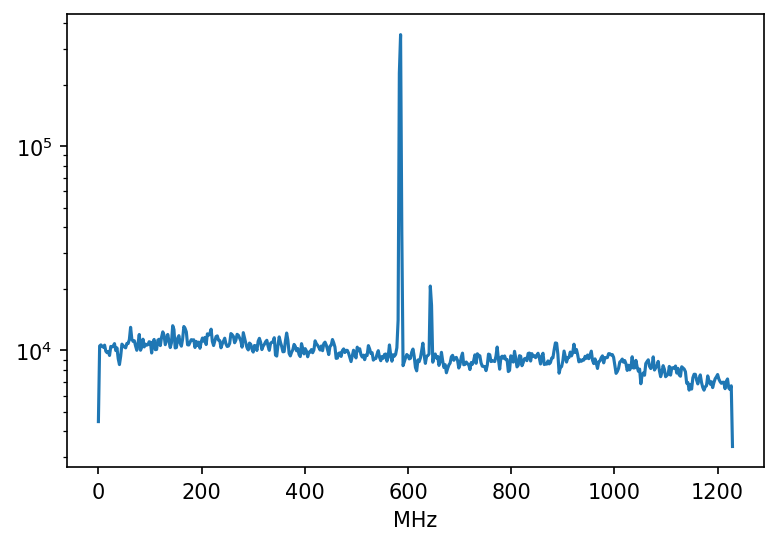

In [34]:
###################
### DAC Setting ###
###################
dac_channel = 15

freq =5500
nqz = 2

# Set output tone.
soc.generator.set(f=freq, g=0.99, ch=dac_channel)

# Set Nyquist Zone.
soc.set_nyquist(nqz=nqz, ch=dac_channel, btype='dac')

# Set Filter.
#fc = 2.051  # 2.051 is the lowest fc value for a low pass filter
fc = freq/1000
bw = 1
soc.dac_chains[dac_channel].set_filter(fc=fc, bw=bw, ftype='bandpass')
#soc.dac_chains[dac_channel].set_filter(fc=fc, bw=bw, ftype='lowpass')

# Set attenuator on DAC.
soc.dac_chains[dac_channel].set_attn_db(attn=0, db=30)
soc.dac_chains[dac_channel].set_attn_db(attn=1, db=30)
###################
### ADC Setting ###
###################
adc_channel = 4
nqz = 2

# Set Filter.
fc = freq/1000
bw = 1.0
soc.adc_chains[adc_channel].set_filter(fc=fc, bw=bw, ftype='bandpass',debug=False)
# soc.adc_chains[adc_channel].set_filter(fc=2.051, bw=bw, ftype='lowpass',debug=False)

# Set attenuator on ADC.
soc.adc_chains[adc_channel].set_attn_db(db=20)

# Set Nyquist Zone.
soc.set_nyquist(nqz=nqz, ch=adc_channel, btype='adc')

# Get data.
fs = soc.buffer.fs
x = soc.buffer.get_data(ch=adc_channel)

fft_freqs, psd = welch(x, fs, return_onesided=True, nperseg=1024, detrend=False)
plt.semilogy(fft_freqs, psd)
plt.xlabel("MHz")

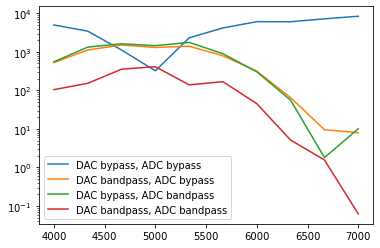

In [106]:
# dac_channel = 14
# adc_channel = 5
# atts = (10, 30, 20)
dac_channel = 15
adc_channel = 4
atts = (30, 30, 20)


# Set Nyquist Zone.
soc.set_nyquist(nqz=2, ch=dac_channel, btype='dac')

# # Set Nyquist Zone.
# soc.set_nyquist(nqz=2, ch=adc_channel, btype='adc')


# Set attenuator on DAC.
soc.dac_chains[dac_channel].set_attn_db(attn=0, db=atts[0])
soc.dac_chains[dac_channel].set_attn_db(attn=1, db=atts[1])

# Set attenuator on ADC.
soc.adc_chains[adc_channel].set_attn_db(db=atts[2])

freq =5500
fc = freq/1000
bw = 1.0

# Set Filter.
#fc = 2.051  # 2.051 is the lowest fc value for a low pass filter
# fc = freq/1000
# bw = 1
# soc.dac_chains[dac_channel].set_filter(fc=fc, bw=bw, ftype='bandpass')
# #soc.dac_chains[dac_channel].set_filter(fc=fc, bw=bw, ftype='lowpass')
# # soc.dac_chains[dac_channel].set_filter(fc=fc, bw=bw, ftype='bypass')


# # Set Filter.
# fc = freq/1000
# bw = 1.0
# soc.adc_chains[adc_channel].set_filter(fc=fc, bw=bw, ftype='bandpass',debug=False)
# # soc.adc_chains[adc_channel].set_filter(fc=2.051, bw=bw, ftype='lowpass',debug=False)
# # soc.adc_chains[adc_channel].set_filter(fc=fc, bw=bw, ftype='bypass',debug=False)

fs = soc.buffer.fs
freqs = np.linspace(4000, 7000, 10)


for filtmode in [('bypass','bypass'), ('bandpass','bypass'), ('bypass','bandpass'), ('bandpass','bandpass')]:
    soc.dac_chains[dac_channel].set_filter(fc=fc, bw=bw, ftype=filtmode[0],debug=False)
    soc.adc_chains[adc_channel].set_filter(fc=fc, bw=bw, ftype=filtmode[1],debug=False)
    
    powers = []
    for i,f_tone in enumerate(freqs):
        # Set output tone.
        soc.generator.set(f=f_tone, g=0.99, ch=dac_channel)

        # Get data.
        x = soc.buffer.get_data(ch=adc_channel)

        rounded_freq = np.round(f_tone/soc.generator.ctrl.df)*soc.generator.ctrl.df
        demod = np.exp(1j*2*np.pi*np.arange(len(x))*rounded_freq/fs)*x
        powers.append(np.abs(demod.mean()))

    plt.semilogy(freqs,powers, label="DAC %s, ADC %s"%(filtmode[0], filtmode[1]))
    
plt.legend();